In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

import re
import json

In [1]:
def comp_matrix_to_shared_unique(filename, A_name='A', B_name='B'):
    """Convert Kat matrix to dataframe of shared vs. unique k-mer counts
    
    Reformat to a dataframe for plotting k-mer count spectra by 
    taking row and col sums after slicing the first row and col 
    representing k-mers unique to either input library.
    """
    mx = np.loadtxt(filename, dtype=int)
    # unique k-mers in either library A or B
    A_unique = mx[:,0]
    B_unique = mx[0,:]
    # col and row sums for shared k-mers
    A_shared = mx[1:, 1:].sum(axis=1)
    B_shared = mx[1:, 1:].sum(axis=0)
    # insert zero values to bring all arrays to same length
    A_shared = np.insert(A_shared, 0, [0])
    B_shared = np.insert(B_shared, 0, [0])
    df = pd.DataFrame({f'{A_name}_unique' : A_unique, 
                       f'{B_name}_unique' : B_unique, 
                       f'{A_name}_shared' : A_shared, 
                       f'{B_name}_shared' : B_shared})
    df = df.reset_index().melt(id_vars='index', var_name='comb', value_name='count')
    df[['library','shared']] = df['comb'].str.split('_',expand=True)
    return(df)

# Read libraries vs reference MAC assembly

## Plot k-mer frequency for each copy-number in reference

Plot counts vs. k-mer frequencies in unassembled read libraries.

Corresponding k-mer frequencies in reference genome depicted as separate lines.

This corresponds to the 'assembly spectra copy number plots' or spectra-cn plots in `kat`.

spectra-cn plots in kat use stacked histogram style. We can depict them here as either stacked or unstacked. Stacking them has advantage of showing total k-mer counts. Not stacking them lets us interpret each curve individually without distortion from stacking.

In [3]:
mx_MAC = np.loadtxt('../kat/kat-comp.k21.LmagMAC.all.LmagMAC.asm-main.mx', dtype=int)
mx_MIC = np.loadtxt('../kat/kat-comp.k21.LmagMIC.all.LmagMAC.asm-main.mx', dtype=int)

In [4]:
dff_MAC = pd.DataFrame(mx_MAC).reset_index().melt(id_vars='index')
dff_MAC['variable'] = pd.to_numeric(dff_MAC['variable'])
dff_MAC['index'] = pd.to_numeric(dff_MAC['index'])

dff_MIC = pd.DataFrame(mx_MIC).reset_index().melt(id_vars='index')
dff_MIC['variable'] = pd.to_numeric(dff_MIC['variable'])
dff_MIC['index'] = pd.to_numeric(dff_MIC['index'])

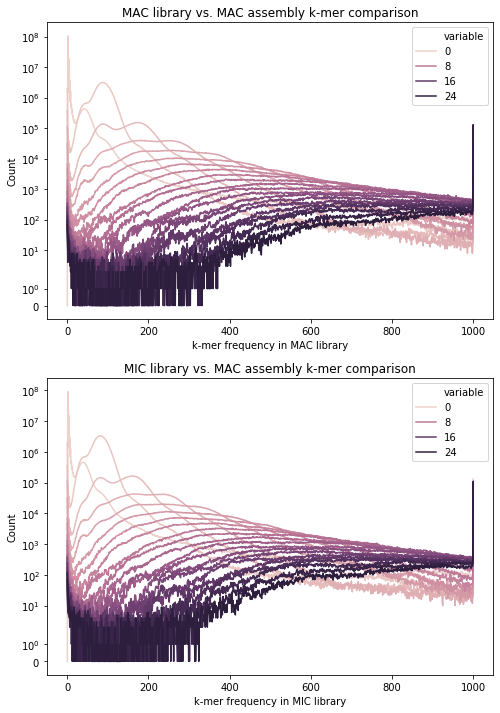

In [5]:
# UNSTACKED LINE PLOT
plt.figure(figsize=(8,12))

plt.subplot(211)
sns.lineplot(data=dff_MAC.query('variable <=20'), x='index',y='value', hue='variable')
plt.title("MAC library vs. MAC assembly k-mer comparison")
plt.xlabel("k-mer frequency in MAC library")
plt.ylabel("Count")
plt.yscale('symlog')

plt.subplot(212)
sns.lineplot(data=dff_MIC.query('variable <=20'), x='index',y='value', hue='variable')
plt.title("MIC library vs. MAC assembly k-mer comparison")
plt.xlabel("k-mer frequency in MIC library")
plt.ylabel("Count")
plt.yscale('symlog')

plt.savefig("kat-comp.k21.LmagMAC_LmagMIC.all.LmagMAC.asm-main.spectra-cn_unstacked.png")
plt.savefig("kat-comp.k21.LmagMAC_LmagMIC.all.LmagMAC.asm-main.spectra-cn_unstacked.pdf")

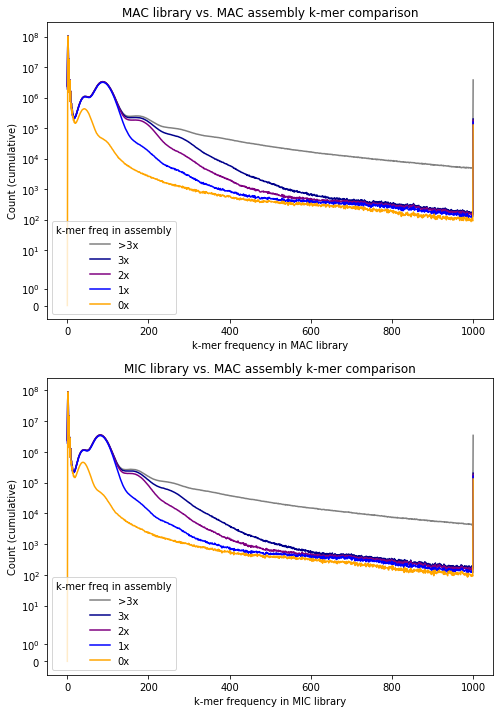

In [6]:
# STACKED LINES PLOT
plt.figure(figsize=(8,12))

plt.subplot(211)
plt.plot(range(len(mx_MAC[:,0])), mx_MAC[:,:].sum(axis=1), color='grey', label='>3x')
plt.plot(range(len(mx_MAC[:,0])), mx_MAC[:,0:4].sum(axis=1), color='darkblue', label='3x')
plt.plot(range(len(mx_MAC[:,0])), mx_MAC[:,0:3].sum(axis=1), color='purple', label='2x')
plt.plot(range(len(mx_MAC[:,0])), mx_MAC[:,0:2].sum(axis=1), color='blue', label='1x')
plt.plot(range(len(mx_MAC[:,0])), mx_MAC[:,0:1].sum(axis=1), color='orange', label='0x')
plt.yscale('symlog')
plt.legend(title='k-mer freq in assembly', loc='lower left')
plt.title("MAC library vs. MAC assembly k-mer comparison")
plt.xlabel("k-mer frequency in MAC library")
plt.ylabel("Count (cumulative)")
#plt.xlim(0,400)

plt.subplot(212)
plt.plot(range(len(mx_MIC[:,0])), mx_MIC[:,:].sum(axis=1), color='grey', label='>3x')
plt.plot(range(len(mx_MIC[:,0])), mx_MIC[:,0:4].sum(axis=1), color='darkblue', label='3x')
plt.plot(range(len(mx_MIC[:,0])), mx_MIC[:,0:3].sum(axis=1), color='purple', label='2x')
plt.plot(range(len(mx_MIC[:,0])), mx_MIC[:,0:2].sum(axis=1), color='blue', label='1x')
plt.plot(range(len(mx_MIC[:,0])), mx_MIC[:,0:1].sum(axis=1), color='orange', label='0x')
plt.yscale('symlog')
plt.legend(title='k-mer freq in assembly', loc='lower left')
plt.title("MIC library vs. MAC assembly k-mer comparison")
plt.xlabel("k-mer frequency in MIC library")
plt.ylabel("Count (cumulative)")
#plt.xlim(0,400)

plt.savefig("kat-comp.k21.LmagMAC_LmagMIC.all.LmagMAC.asm-main.spectra-cn_stacked.png")
plt.savefig("kat-comp.k21.LmagMAC_LmagMIC.all.LmagMAC.asm-main.spectra-cn_stacked.pdf")

# Pairwise comparison of MIC vs MAC libraries (subsamples)

In [7]:
lib_AB = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LmagMAC.rep1.LmagMAC.rep2.150000000-main.mx",
                                      A_name='MAC.1', B_name='MAC.2')
lib_AC = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LmagMAC.rep1.LmagMIC.rep1.150000000-main.mx",
                                      A_name='MAC.1', B_name='MIC.1')
lib_AD = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LmagMAC.rep1.LmagMIC.rep2.150000000-main.mx",
                                      A_name='MAC.1', B_name='MIC.2')
lib_BC = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LmagMAC.rep2.LmagMIC.rep1.150000000-main.mx",
                                      A_name='MAC.2', B_name='MIC.1')
lib_BD = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LmagMAC.rep2.LmagMIC.rep2.150000000-main.mx",
                                      A_name='MAC.2', B_name='MIC.2')
lib_CD = comp_matrix_to_shared_unique("../kat/kat-comp.k21.LmagMIC.rep1.LmagMIC.rep2.150000000-main.mx",
                                      A_name='MIC.1', B_name='MIC.2')

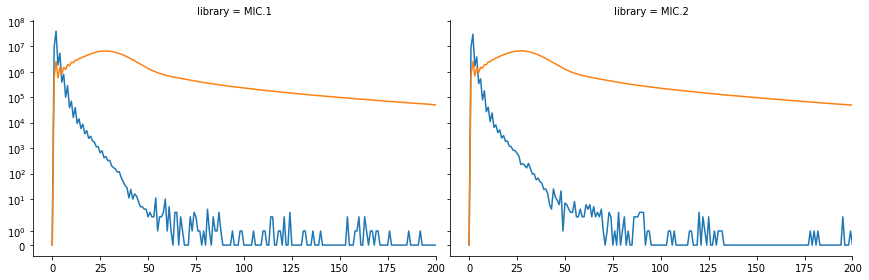

In [8]:
g = sns.FacetGrid(lib_CD, col='library', hue='shared', height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x='index', y='count')
plt.xlim(-10,200)
plt.yscale('symlog')

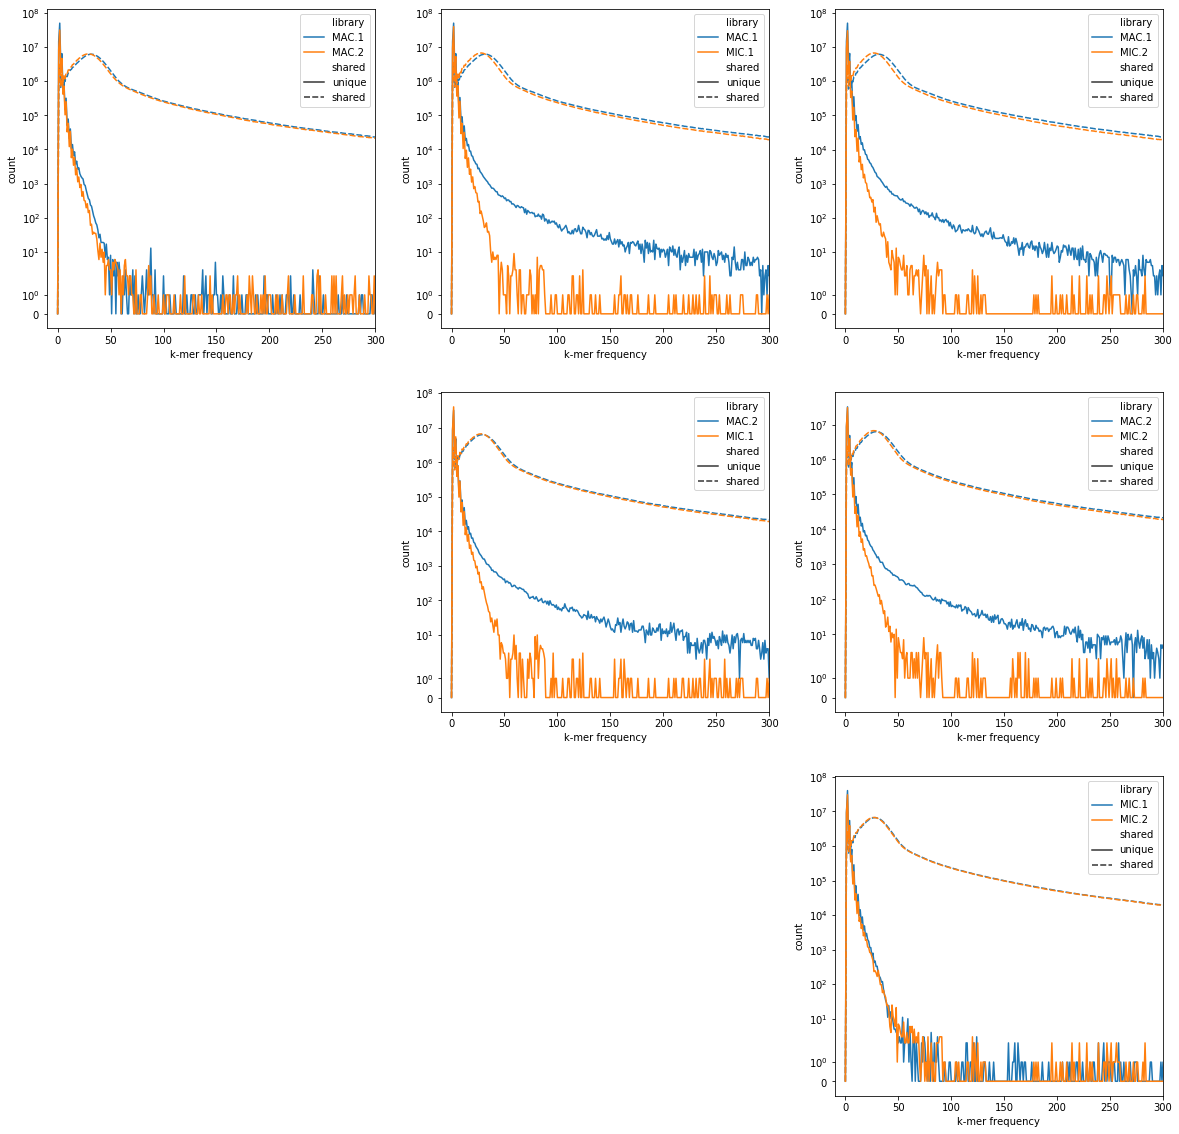

In [10]:
# Pairwise comparisons of k-mer shared vs. unique composition in 
# MIC vs. MAC libraries

plt.figure(figsize=(20,20))
plt.subplot(331)
sns.lineplot(data=lib_AB, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.subplot(332)
sns.lineplot(data=lib_AC, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.subplot(333)
sns.lineplot(data=lib_AD, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.subplot(335)
sns.lineplot(data=lib_BC, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.subplot(336)
sns.lineplot(data=lib_BD, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.subplot(339)
sns.lineplot(data=lib_CD, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.yscale('symlog')

plt.savefig("kat-comp.k21.LmagMAC_LmagMIC.150M-subsample_pairwise_comp.png")
plt.savefig("kat-comp.k21.LmagMAC_LmagMIC.150M-subsample_pairwise_comp.pdf")

In [11]:
lib_MAC_MIC = comp_matrix_to_shared_unique(
    "../kat/kat-comp.k21.LmagMAC.all.LmagMIC.all-main.mx",
    A_name='MAC', B_name='MIC')

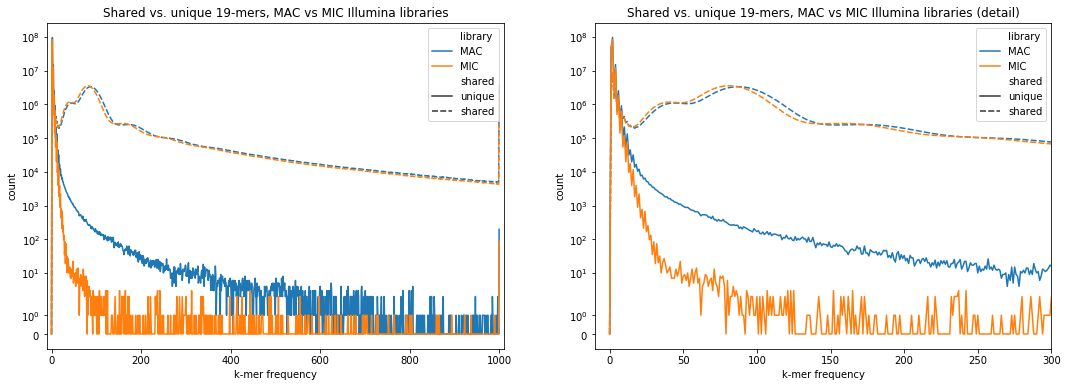

In [12]:
plt.figure(figsize=(18,6))

plt.subplot(121)
sns.lineplot(data=lib_MAC_MIC, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,1010)
plt.xlabel("k-mer frequency")
plt.title("Shared vs. unique 19-mers, MAC vs MIC Illumina libraries")
plt.yscale('symlog')

plt.subplot(122)
sns.lineplot(data=lib_MAC_MIC, x='index', y='count', style='shared', hue='library')
plt.xlim(-10,300)
plt.xlabel("k-mer frequency")
plt.title("Shared vs. unique 19-mers, MAC vs MIC Illumina libraries (detail)")
plt.yscale('symlog')

plt.savefig("kat-comp.k21.LmagMAC.all.LmagMIC.all.pairwise_comp.png")
plt.savefig("kat-comp.k21.LmagMAC.all.LmagMIC.all.pairwise_comp.pdf")

# Heatmap plots

In [13]:
mx_MIC_MAC = np.loadtxt(
    "../kat/kat-comp.k21.LmagMAC.all.LmagMIC.all-main.mx",
    dtype=int)

Use `log1p` scale to avoid Inf at zero values in matrix

In [14]:
%%bash
head -n10 ../kat/kat-comp.k21.LmagMAC.all.LmagMIC.all-main.mx

# Title:K-mer comparison plot
# XLabel:21-mer frequency for: 4615_A_R1_ktrim_qtrim28.fq.gz 4519_A_R1_ktrim_qtrim28.fq.gz 4615_A_R2_ktrim_qtrim28.fq.gz 4519_A_R2_ktrim_qtrim28.fq.gz 4615_C_R1_ktrim_qtrim28.fq.gz 4519_C_R1_ktrim_qtrim28.fq.gz 4615_C_R2_ktrim_qtrim28.fq.gz 4519_C_R2_ktrim_qtrim28.fq.gz
# YLabel:21-mer frequency for: 4615_B_R1_ktrim_qtrim28.fq.gz 4519_B_R1_ktrim_qtrim28.fq.gz 4615_B_R2_ktrim_qtrim28.fq.gz 4519_B_R2_ktrim_qtrim28.fq.gz 4615_D_R1_ktrim_qtrim28.fq.gz 4519_D_R1_ktrim_qtrim28.fq.gz 4615_D_R2_ktrim_qtrim28.fq.gz 4519_D_R2_ktrim_qtrim28.fq.gz
# ZLabel:# distinct 21-mers
# Columns:1001
# Rows:1001
# MaxVal:96456755
# Transpose:1
# Kmer value:21
# Input 1:/ebio/abt2_projects/ag-swart-loxodes/data/reads-trim/4615_A_R1_ktrim_qtrim28.fq.gz /ebio/abt2_projects/ag-swart-loxodes/data/reads-trim/4519_A_R1_ktrim_qtrim28.fq.gz /ebio/abt2_projects/ag-swart-loxodes/data/reads-trim/4615_A_R2_ktrim_qtrim28.fq.gz /ebio/abt2_projects/ag-swart-loxodes/data/reads-trim/4519_A_R2_ktr

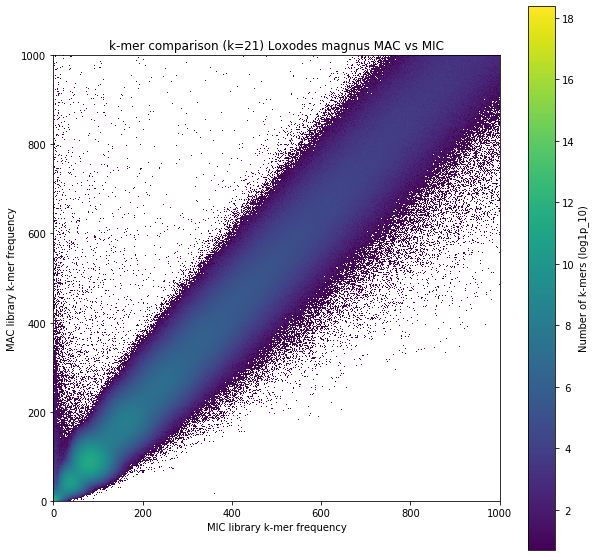

In [16]:
fig,ax = plt.subplots(figsize=(10,10))
toplot = np.log(mx_MIC_MAC+1)
toplot[toplot==0] = None # Trick to avoid plotting zero values
g = ax.imshow(toplot)
plt.colorbar(g, ax=ax, format='%2.0f', label='Number of k-mers (log1p_10)')
ax.set_xlim(0,1000) # specify xlim and ylim explicitly otherwise zero at upper left corner
ax.set_ylim(0,1000)
ax.set_xlabel("MIC library k-mer frequency")
ax.set_ylabel("MAC library k-mer frequency")
ax.set_title("k-mer comparison (k=21) Loxodes magnus MAC vs MIC")
plt.savefig("kat-comp.k21.LmagMAC.all.LmagMIC.all.pairwise_spectrum.png")
plt.savefig("kat-comp.k21.LmagMAC.all.LmagMIC.all.pairwise_spectrum.pdf")

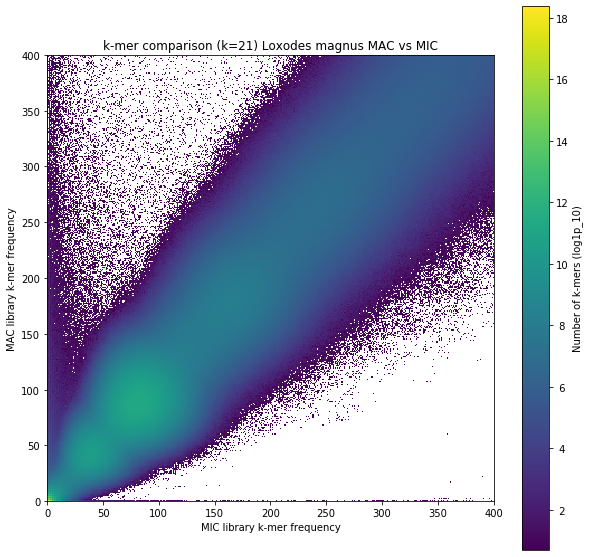

In [17]:
fig,ax = plt.subplots(figsize=(10,10))
toplot = np.log(mx_MIC_MAC+1)
toplot[toplot==0] = None # Trick to avoid plotting zero values
g = ax.imshow(toplot)
plt.colorbar(g, ax=ax, format='%2.0f', label='Number of k-mers (log1p_10)')
ax.set_xlim(0,400) # specify xlim and ylim explicitly otherwise zero at upper left corner
ax.set_ylim(0,400)
ax.set_xlabel("MIC library k-mer frequency")
ax.set_ylabel("MAC library k-mer frequency")
ax.set_title("k-mer comparison (k=21) Loxodes magnus MAC vs MIC")
plt.savefig("kat-comp.k21.LmagMAC.all.LmagMIC.all.pairwise_spectrum_detail.png")
plt.savefig("kat-comp.k21.LmagMAC.all.LmagMIC.all.pairwise_spectrum_detail.pdf")

Text(0.5, 1.0, 'k-mer comparison (k=21) Loxodes magnus MAC vs MIC')

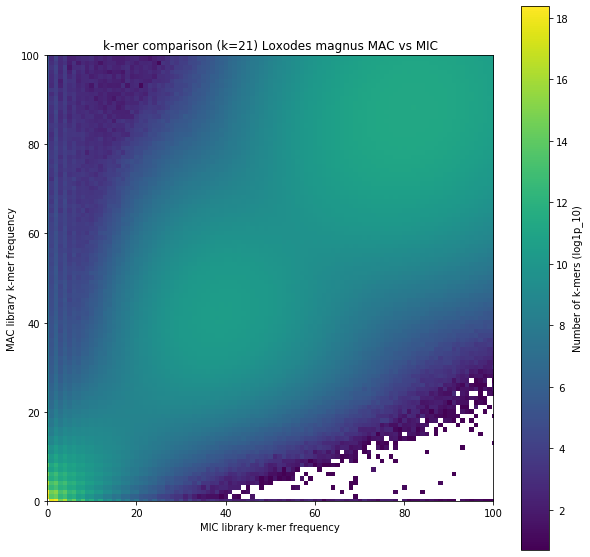

In [18]:
fig,ax = plt.subplots(figsize=(10,10))
toplot = np.log(mx_MIC_MAC+1)
toplot[toplot==0] = None # Trick to avoid plotting zero values
g = ax.imshow(toplot)
plt.colorbar(g, ax=ax, format='%2.0f', label='Number of k-mers (log1p_10)')
ax.set_xlim(0,100) # specify xlim and ylim explicitly otherwise zero at upper left corner
ax.set_ylim(0,100)
ax.set_xlabel("MIC library k-mer frequency")
ax.set_ylabel("MAC library k-mer frequency")
ax.set_title("k-mer comparison (k=21) Loxodes magnus MAC vs MIC")

In [22]:
k_counts = []
for mac_freq in range(0,1001):
    for mic_freq in range(0,1001):
        k_counts.append([mac_freq, mic_freq, mx_MIC_MAC[mac_freq, mic_freq]])
k_counts_df = pd.DataFrame(k_counts,columns=['mac_freq','mic_freq','count'])

## Shared vs. unique k-mers for different cutoffs

Plot spectra and count shared vs. unique k-mers, for different cutoff values for 'unique'. 

Strict definition of 'unique' is a k-mer that has frequency 0 in library A and frequency >0 in library B

Looser definition of 'unique' allows frequency <= N in library A and frequency > N in library B.

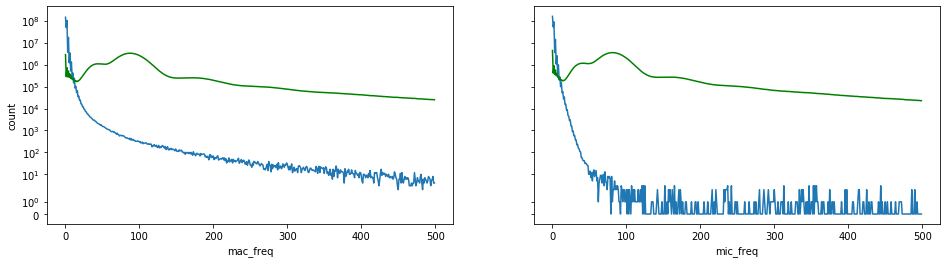

In [47]:
uniq_lim = 5 # frequency threshold to consider something unique or shared 
plot_max = 500 # max value to show in plot

# MAC 
fig, axs = plt.subplots(1,2, sharey=True, figsize=(16,4))
sns.lineplot(
    data=k_counts_df.query(
        f'mic_freq<={uniq_lim}').groupby(
        'mac_freq').agg(
        sum)['count'].reset_index().query(f'mac_freq<{plot_max}'),
    x='mac_freq', y='count',
    ax=axs[0])
sns.lineplot(
    data=k_counts_df.query(
        f'mic_freq>{uniq_lim}').groupby(
        'mac_freq').agg(sum)['count'].reset_index().query(f'mac_freq<{plot_max}'),
    x='mac_freq', y='count',
    color='green',
    ax=axs[0])
axs[0].set_yscale('symlog')

# MIC
sns.lineplot(
    data=k_counts_df.query(
        f'mac_freq<={uniq_lim}').groupby(
        'mic_freq').agg(sum)['count'].reset_index().query(f'mic_freq<{plot_max}'),
    x='mic_freq', y='count',
    ax=axs[1])
sns.lineplot(
    data=k_counts_df.query(
        f'mac_freq>{uniq_lim}').groupby(
        'mic_freq').agg(sum)['count'].reset_index().query(f'mic_freq<{plot_max}'),
    x='mic_freq', y='count',
    color='green',
    ax=axs[1])
axs[1].set_yscale('symlog')
#plt.vlines(5, 0, 1e7, color='grey', alpha=0.5)

In [108]:
k_counts_df['count'].sum()

562127924

In [25]:
# Singleton k-mers, observed 1 time in either library
print(f"Number of singleton k-mers: {str(k_counts_df.query('mac_freq == 1 or mic_freq == 1')['count'].sum())}")
print(f"Fraction of singleton k-mers: {str(k_counts_df.query('mac_freq == 1 or mic_freq == 1')['count'].sum() / k_counts_df['count'].sum())}")

Number of singleton k-mers: 101746401
Fraction of singleton k-mers: 0.18100221792219665


In [61]:
# Singleton k-mers, observed >=1000 times in either library
print(f"Number of repeat k-mers: {str(k_counts_df.query('mac_freq >=1000 or mic_freq >= 1000')['count'].sum())}")
print(f"Fraction of repeat k-mers: {str(k_counts_df.query('mac_freq >= 1000 or mic_freq >= 1000')['count'].sum() / k_counts_df['count'].sum())}")

Number of repeat k-mers: 3837449
Fraction of repeat k-mers: 0.006826647167238039


In [49]:
# Error k-mers, observed <=5 times in both libraries
print("Cutoff = 5")
print(f"Number of error k-mers: {str(k_counts_df.query('mac_freq+mic_freq<=5')['count'].sum())}")
print(f"Fraction of error k-mers: {str(k_counts_df.query('mac_freq+mic_freq<=5')['count'].sum() / k_counts_df['count'].sum())}")

print("Cutoff = 15")
print(f"Number of error k-mers: {str(k_counts_df.query('mac_freq+mic_freq<=15')['count'].sum())}")
print(f"Fraction of error k-mers: {str(k_counts_df.query('mac_freq+mic_freq<=15')['count'].sum() / k_counts_df['count'].sum())}")

Cutoff = 5
Number of error k-mers: 317482952
Fraction of error k-mers: 0.564787726147545
Cutoff = 15
Number of error k-mers: 333382445
Fraction of error k-mers: 0.5930722007683077


In [60]:
# K-mers that are not error k-mers, and which are observed >5 times in both libraries
limit=5
print(f"k-mers observed >{str(limit)} times in both libraries")
print(k_counts_df.query('mac_freq+mic_freq>5').query(f'mic_freq>{limit} and mac_freq>{limit}')['count'].sum())
print("As fraction of total: ")
print(k_counts_df.query('mac_freq+mic_freq>5').query(f'mic_freq>{limit} and mac_freq>{limit}')['count'].sum() / k_counts_df['count'].sum())
print(f"As fraction of non-error k-mers (cutoff 5): ")
print(k_counts_df.query('mac_freq+mic_freq>5').query(f'mic_freq>{limit} and mac_freq>{limit}')['count'].sum() / k_counts_df.query('mac_freq+mic_freq>5')['count'].sum())

k-mers observed >5 times in both libraries
228392792
As fraction of total: 
0.4063003851059354
As fraction of non-error k-mers (cutoff 5): 
0.9335683056670382


In [55]:
# K-mers that are not error k-mers, and which are observed >5 times in both libraries
limit=15
print(f"k-mers observed >{str(limit)} times in both libraries")
print(k_counts_df.query('mac_freq+mic_freq>5').query(f'mic_freq>{limit} and mac_freq>{limit}')['count'].sum())
print("As fraction of total: ")
print(k_counts_df.query('mac_freq+mic_freq>5').query(f'mic_freq>{limit} and mac_freq>{limit}')['count'].sum() / k_counts_df['count'].sum())
print(f"As fraction of non-error k-mers (cutoff 5): ")
print(k_counts_df.query('mac_freq+mic_freq>5').query(f'mic_freq>{limit} and mac_freq>{limit}')['count'].sum() / k_counts_df.query('mac_freq+mic_freq>5')['count'].sum())

k-mers observed >15 times in both libraries
225430164
As fraction of total: 
0.40103000469338007
As fraction of non-error k-mers (cutoff 5): 
0.9214583980904377


In [59]:
# K-mers that are not error k-mers, which are observed <=5 times in one library but >5 times in the other
limit=1
print(f"Unique k-mers, cutoff {str(limit)}")
print("")
print("Absent in MIC but present in MAC")
print(k_counts_df.query('mac_freq+mic_freq>5').query(f'mic_freq<={limit} and mac_freq>{limit}')['count'].sum())
print("As fraction of non-error k-mers (cutoff 5)")
print(k_counts_df.query('mac_freq+mic_freq>5').query(f'mic_freq<={limit} and mac_freq>{limit}')['count'].sum() / k_counts_df.query('mac_freq+mic_freq>5')['count'].sum())
print("")
print("Absent in MAC but present in MIC")
print(k_counts_df.query('mac_freq+mic_freq>5').query(f'mac_freq<={limit} and mic_freq>{limit}')['count'].sum())
print("As fraction of non-error k-mers (cutoff 5)")
print(k_counts_df.query('mac_freq+mic_freq>5').query(f'mac_freq<={limit} and mic_freq>{limit}')['count'].sum() / k_counts_df.query('mac_freq+mic_freq>5')['count'].sum())

Unique k-mers, cutoff 1

Absent in MIC but present in MAC
4977959
As fraction of non-error k-mers (cutoff 5)
0.020347685706780028

Absent in MAC but present in MIC
3261749
As fraction of non-error k-mers (cutoff 5)
0.013332581386548996


Text(0.5, 0, 'MIC kmer frequency')

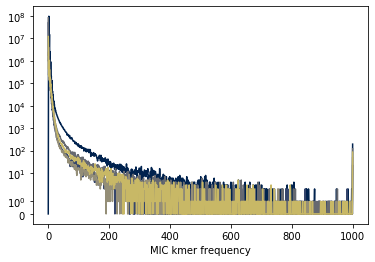

In [29]:
cmap = plt.cm.cividis
mac_min=0
mac_max=5
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MIC kmer frequency")

Text(0.5, 0, 'MIC kmer frequency')

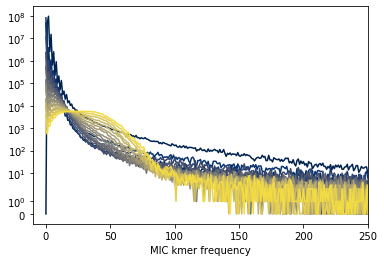

In [30]:
cmap = plt.cm.cividis
mac_min=0
mac_max=20
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlim(-10,250)
ax.set_xlabel("MIC kmer frequency")

We should aim to pull out k-mers that have frequency 0 to 5 in MAC and frequency >5 in MIC. Cutoff is arbitrary but we reason that is reasonable to exclude noise from sequencing error.

Text(0.5, 0, 'MIC kmer frequency')

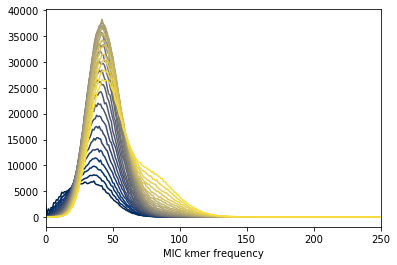

In [31]:
cmap = plt.cm.cividis
mac_min=20
mac_max=50
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
#ax.set_yscale('symlog')
ax.set_xlim(0,250)
ax.set_xlabel("MIC kmer frequency")

Text(0.5, 0, 'MAC kmer frequency')

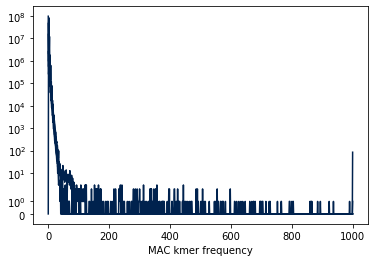

In [32]:
cmap = plt.cm.cividis
mic_min=0
mic_max=5
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mic_min,mic_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[i,:],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MAC kmer frequency")

(-10, 250)

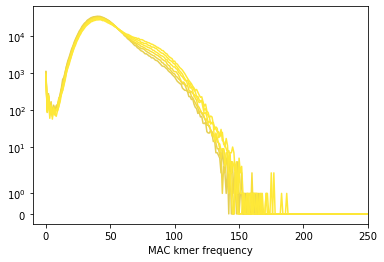

In [33]:
cmap = plt.cm.cividis
mic_min=47
mic_max=53
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mic_min,mic_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[i,:],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MAC kmer frequency")
plt.xlim(-10,250)

(-10, 250)

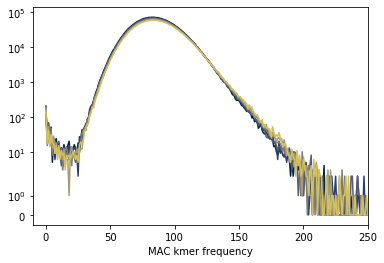

In [34]:
cmap = plt.cm.cividis
mic_min=97
mic_max=103
norm = colors.Normalize(vmin=mic_min, vmax=mic_max)

fig,ax = plt.subplots()
for i in range(mic_min,mic_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[i,:],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MAC kmer frequency")
plt.xlim(-10,250)

(-10, 250)

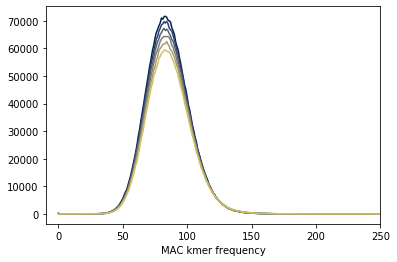

In [35]:
cmap = plt.cm.cividis
mic_min=97
mic_max=103
norm = colors.Normalize(vmin=mic_min, vmax=mic_max)

fig,ax = plt.subplots()
for i in range(mic_min,mic_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[i,:],
             color=cmap(norm(i)))
ax.set_xlabel("MAC kmer frequency")
plt.xlim(-10,250)

(-10, 250)

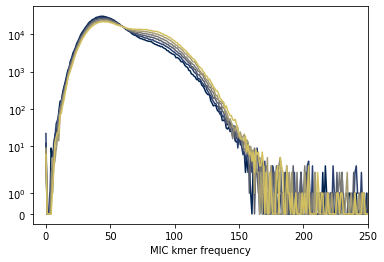

In [36]:
cmap = plt.cm.cividis
mac_min=47
mac_max=53
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MIC kmer frequency")
plt.xlim(-10,250)

(-10, 250)

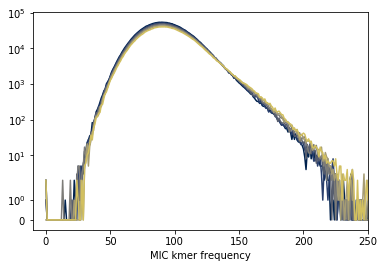

In [37]:
cmap = plt.cm.cividis
mac_min=97
mac_max=103
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
ax.set_yscale('symlog')
ax.set_xlabel("MIC kmer frequency")
plt.xlim(-10,250)

(-10, 250)

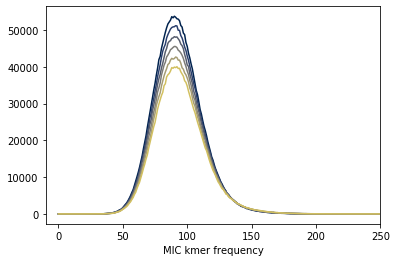

In [38]:
cmap = plt.cm.cividis
mac_min=97
mac_max=103
norm = colors.Normalize(vmin=mac_min, vmax=mac_max)

fig,ax = plt.subplots()
for i in range(mac_min,mac_max):
    g = ax.plot(range(1001),
             mx_MIC_MAC[:,i],
             color=cmap(norm(i)))
ax.set_xlabel("MIC kmer frequency")
plt.xlim(-10,250)